<H1>Project 3 - Machine Learning with Numpy-Pandas-Scikit-learn</H1><br>

In [1]:
import numpy as np
import pandas as pd      
import matplotlib.pyplot as plt
import seaborn as sns    # built on top of matplotlib
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df = pd.read_csv("diabetes2.csv") #Reading the dataset in a dataframe using Pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df1 = df.copy(deep=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data = df1.copy(deep=True)
X = data.drop('class', axis = 1).values
y = data['class'].values

In [5]:
def data_split(Xt, yt, t_size):
    Xtrain, Xtest, ytrain, ytest = train_test_split(Xt, yt, test_size=0.3, random_state=1,stratify=y)
    return Xtrain, Xtest, ytrain, ytest

In [6]:
def minmax_s(Xtrain, Xtest): #minmax_scaler function
    min_max_scaler = MinMaxScaler()
    Xtrain_minmax = min_max_scaler.fit_transform(Xtrain)
    Xtest_minmax = min_max_scaler.transform(Xtest)
    return Xtrain_minmax, Xtest_minmax

In [7]:
def imput_(df, strat, drop_list=[]):
    #_ df: panda data frame
    #_ strat: string strategy to replace NaNs: 'mean', 'median', ...
    #_ drop-list: list of string items: containing the features 'columns' with most NaNs to be dropped
    df2 = df.copy(deep=True)
    drop_list += ['class']
    # use replace as pure function:
    df2['plas']= df['plas'].replace(0,np.NaN)
    df2['pres'] = df2['pres'].replace(0,np.NaN)
    df2['mass'].replace(0,np.NaN, inplace=True) 
    data2 = df2.copy(deep=True)
    data2 = data2.dropna(thresh=8) #drops rows containing 2 or more 'NaNs'
    data2['skin'] = data2['skin'].replace(0,np.NaN)
    data2['insu'] = data2['insu'].replace(0,np.NaN)
    X = data2.drop(drop_list, axis = 1).values
    y = data2['class'].values
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
    imp_x = Imputer(missing_values='NaN', strategy= strat, axis=0)
    Xtrain = imp_x.fit_transform(Xtrain)# # fit AND transform training set
    Xtest = imp_x.transform(Xtest) # transform test set on scale fitted to training set
    return Xtrain, Xtest, ytrain, ytest

In [8]:
def imput_drop_more(df, strat, drop_list=[]):
    #_ df: panda data frame
    #_ strat: string strategy to replace NaNs: 'mean', 'median', ...
    #_ drop-list: list of string items: containing the features 'columns' with most NaNs to be dropped
    df2 = df.copy(deep=True)
    drop_list += ['class']
    # use replace as pure function:
    df2['plas']= df['plas'].replace(0,np.NaN)
    df2['pres'] = df2['pres'].replace(0,np.NaN)
    # use replace as mutator by setting arg inplace=True 
    df2['mass'].replace(0,np.NaN, inplace=True) 
    data2 = df2.copy(deep=True)
    data2 = data2.dropna(subset=['pres'])
    data2['skin'] = data2['skin'].replace(0,np.NaN)
    data2['insu'] = data2['insu'].replace(0,np.NaN)
    X = data2.drop(drop_list, axis = 1).values
    y = data2['class'].values
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
    imp_x = Imputer(missing_values='NaN', strategy= strat, axis=0)
    Xtrain = imp_x.fit_transform(Xtrain)# # fit AND transform training set
    Xtest = imp_x.transform(Xtest) # transform test set on scale fitted to training set
    return Xtrain, Xtest, ytrain, ytest

In [9]:
def roc_curv(ytest, yscore): #Displaying ROC curve plot using decision function method
    roc_num = roc_auc_score(ytest, yscore)
    fpr, tpr, thresholds = roc_curve(ytest, yscore)
    #print 'fpr', fpr.shape, 'tpr', tpr.shape, 'y_score', yscore.shape
    roc_auc = auc(fpr, tpr)
    print "AUC using decision_function: ", roc_auc
    # Compute micro-average ROC curve and ROC area
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [10]:
def roc_curv_prob(ytest, probas): #Displaying ROC curve plot using probability method
    fpr, tpr, thresholds = roc_curve(ytest, probas[:, 1])  # use the probs of (smoke), not of nonsmoking
    roc_auc = auc(fpr, tpr)
    print "AUC using predict_proba", roc_auc
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

<H1>ploykernel:</H1>

In [11]:
def clss_report(ytest, ypred):
    report = classification_report(ytest, ypred)
    print report #for each class prints: precision  recall  f1-score   support

In [12]:
def svc_poly(Xtrain, Xtest, ytrain, ytest, c, g):
    svc = SVC(kernel='poly', C=c, gamma = g, degree = 3, cache_size=1000, probability=True) # degree: polynomial degree
    svc.fit(Xtrain, ytrain)
    ypred = svc.predict(Xtest)
    print "\nPrediction accuracy: ", svc.score(Xtest, ytest)
    print "\nConfusion Matrix:\n", confusion_matrix(ytest, ypred)
    yscore = svc.fit(Xtrain, ytrain).decision_function(Xtest)
    return ypred, yscore

<b>comapring decision function and predict probability to plot the ROC curve:</b><br>
The result shows that ROC curve is the same in both methods. Therefore, I use decision function moving forward.


Prediction accuracy:  0.722943722944

Confusion Matrix:
[[145   5]
 [ 59  22]]
AUC using decision_function:  0.77037037037


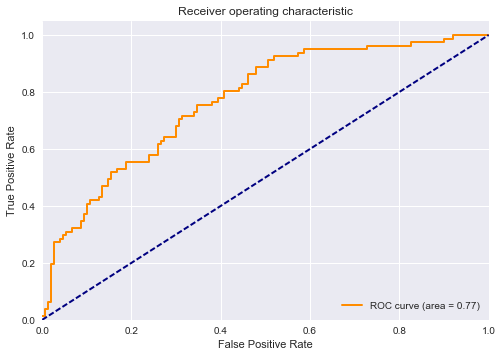

AUC using predict_proba 0.770452674897


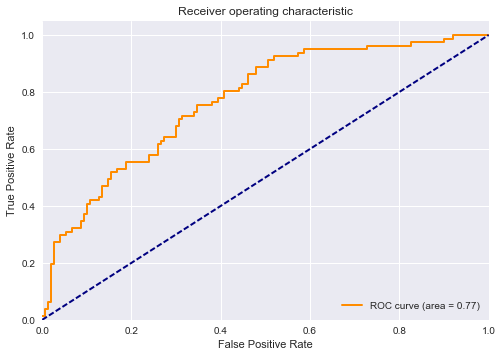

In [13]:
c=1.0
g=0.00001
X_train, X_test, y_train, y_test = data_split(X, y, 0.3)
y_pred, y_score = svc_poly(X_train, X_test, y_train, y_test, c, g)
_ = roc_curv(y_test, y_score)
svc = SVC(kernel='poly', C=c, gamma = g, degree = 3, cache_size=1000, probability=True) # degree: polynomial degree
probas_ = svc.fit(X_train, y_train).predict_proba(X_test)
_ = roc_curv_prob(y_test, probas_)

<H5>Classification Report (poly kernel):</H5>

In [14]:
_ = clss_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.71      0.97      0.82       150
          1       0.81      0.27      0.41        81

avg / total       0.75      0.72      0.67       231



<H3>ploykernel-Minmax scaler:</H3>


Prediction accuracy:  0.727272727273

Confusion Matrix:
[[131  19]
 [ 44  37]]
AUC using decision_function:  0.795555555556


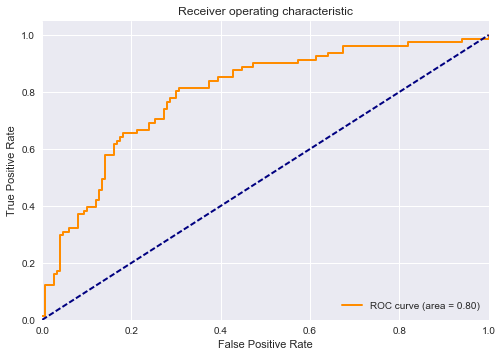

In [15]:
c= 10
g= 1
X_train_minmax, X_test_minmax = minmax_s(X_train, X_test)
y_pred_minmax, y_score_minmax = svc_poly(X_train_minmax, X_test_minmax, y_train, y_test, c, g)
_ = roc_curv(y_test, y_score_minmax)

<H5>Classification Report (poly kernel)-Minmax scaler:</H5>

In [16]:
_ = clss_report(y_test, y_pred_minmax)

             precision    recall  f1-score   support

          0       0.75      0.87      0.81       150
          1       0.66      0.46      0.54        81

avg / total       0.72      0.73      0.71       231



<H3>ploykernel-imputed:</H3>

<b>One approach to handle NAs:</b><br>
drop columns with most NaNs, and use resulting dataset for ML. getting the best result when insu, skin are be dropped with 7 rows that have two or more missing features.


Prediction accuracy:  0.724890829694

Confusion Matrix:
[[144   5]
 [ 58  22]]
AUC using decision_function:  0.765100671141


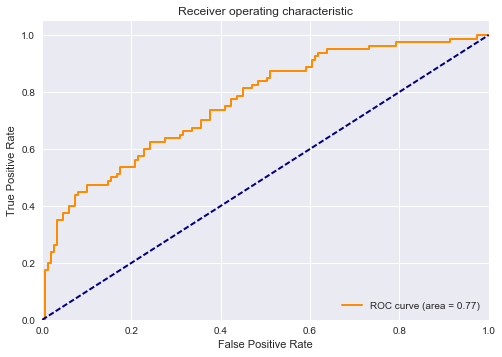


Prediction accuracy:  0.74672489083

Confusion Matrix:
[[144   5]
 [ 53  27]]
AUC using decision_function:  0.778439597315


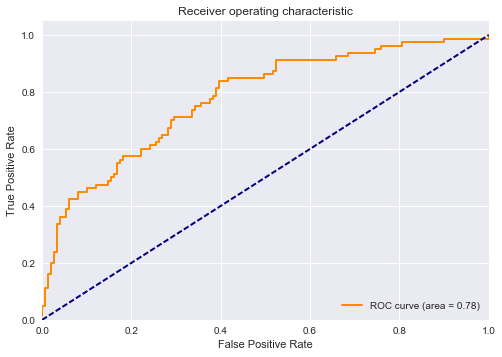

In [17]:
c=1.0
g=0.00001
X_train_imp, X_test_imp, y_train_imp, y_test_imp = imput_(df, "mean", ['insu', 'skin'])
y_pred_imp, y_score_imp = svc_poly(X_train_imp, X_test_imp, y_train_imp, y_test_imp, c, g)
_ = roc_curv(y_test_imp, y_score_imp)
#imputing and only droping 'skin' column
X_train_imp, X_test_imp, y_train_imp, y_test_imp = imput_(df, "mean", ['skin'])
y_pred_imp, y_score_imp = svc_poly(X_train_imp, X_test_imp, y_train_imp, y_test_imp, c, g)
_ = roc_curv(y_test_imp, y_score_imp)

<H5>Classification Report (poly kernel)-imputed:</H5>

In [18]:
_ = clss_report(y_test_imp, y_pred_imp)

             precision    recall  f1-score   support

          0       0.73      0.97      0.83       149
          1       0.84      0.34      0.48        80

avg / total       0.77      0.75      0.71       229



<H3>ploykernel-Minmax scaler-imputed:</H3>


Prediction accuracy:  0.772925764192

Confusion Matrix:
[[137  12]
 [ 40  40]]
AUC using decision_function:  0.795637583893


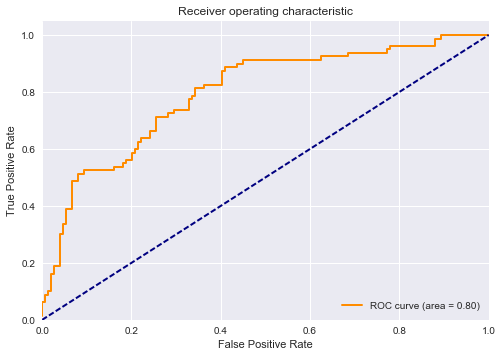

In [19]:
c= 100
g= 1.088
X_train_imp, X_test_imp, y_train_imp, y_test_imp = imput_(df, "mean", ['insu', 'skin'])
X_train_minmax_imp, X_test_minmax_imp = minmax_s(X_train_imp, X_test_imp)
y_pred_minmax_imp, y_score_minmax_imp = svc_poly(X_train_minmax_imp, X_test_minmax_imp, y_train_imp, y_test_imp, c, g)
_ = roc_curv(y_test_imp, y_score_minmax_imp)

<H5>Classification Report (poly kernel)-imputed:</H5>

In [20]:
_ = clss_report(y_test_imp, y_pred_minmax_imp)

             precision    recall  f1-score   support

          0       0.77      0.92      0.84       149
          1       0.77      0.50      0.61        80

avg / total       0.77      0.77      0.76       229



<H3>rbf kernel:</H3>

In [21]:
def svc_rbf(Xtrain, ytrain, Xtest, ytest, c, g):
    svc = SVC(kernel='rbf', C=c, gamma = g)
    svc.fit(Xtrain, ytrain)
    ypred= svc.predict(Xtest)
    print "\nPrediction accuracy: ", svc.score(Xtest, ytest)
    print "\nConfusion Matrix:\n", confusion_matrix(ytest, ypred)
    yscore = svc.fit(Xtrain, ytrain).decision_function(Xtest)
    return ypred, yscore


Prediction accuracy:  0.777292576419

Confusion Matrix:
[[134  15]
 [ 36  44]]
AUC using decision_function:  0.812332214765


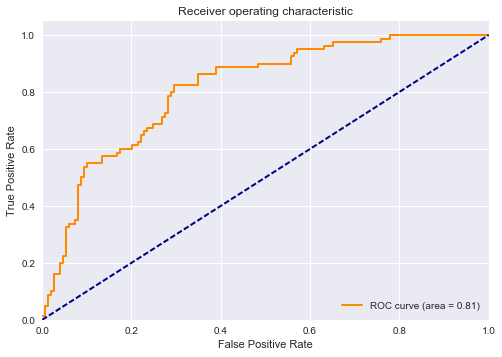

In [22]:
c= 100
g= .881
X_train_imp, X_test_imp, y_train_imp, y_test_imp = imput_(df, "mean", ['insu', 'skin'])
X_train_minmax_imp, X_test_minmax_imp = minmax_s(X_train_imp, X_test_imp)
y_pred_minmax_imp, y_score_minmax_imp= svc_rbf(X_train_minmax_imp, y_train_imp, X_test_minmax_imp, y_test_imp, c, g)
_ = roc_curv(y_test_imp, y_score_minmax_imp)

<H3>Classification Report (rbf kernel):</H3>

In [23]:
_ = clss_report(y_test_imp, y_pred_minmax_imp)

             precision    recall  f1-score   support

          0       0.79      0.90      0.84       149
          1       0.75      0.55      0.63        80

avg / total       0.77      0.78      0.77       229



<H2>Parameter tuning</H2>

In [24]:
C_range = 10.0 ** np.arange(-2, 4)
#C_range = np.linspace(9.2, 10.2, 20)
#gamma_range = 10.0 ** np.arange(-3, 3)
gamma_range = [.001, .01, .088,.1 , .5 ,.88, 1, 10, 100]
#gamma_range = np.linspace(.009, .015, num=20)
print gamma_range
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

[0.001, 0.01, 0.088, 0.1, 0.5, 0.88, 1, 10, 100]


{'C': array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
          1.00000000e+01,   1.00000000e+02,   1.00000000e+03]),
 'gamma': [0.001, 0.01, 0.088, 0.1, 0.5, 0.88, 1, 10, 100]}

In [25]:
# Default is 3-fold cross validation
grid = GridSearchCV(SVC(kernel='rbf',cache_size=10000, probability=True), param_grid=param_grid) 
#grid = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True), param_grid=param_grid) 
grid.fit(X_train_minmax_imp, y_train_imp)# run the grid search on the training data only
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print "The best C and gamma for rbf is: %.5f, %.5s " % (best_C, best_gamma)
grid.best_estimator_

The best C and gamma for rbf is: 10.00000, 0.1 


SVC(C=10.0, cache_size=10000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax_imp)
pTot = accuracy_score(y_test_imp, best_predict_minmax)
print "Prediction accuracy: ",pTot
cm = confusion_matrix(y_test_imp, best_predict_minmax)
print cm
_ = clss_report(y_test_imp, best_predict_minmax)

Prediction accuracy:  0.764192139738
[[137  12]
 [ 42  38]]
             precision    recall  f1-score   support

          0       0.77      0.92      0.84       149
          1       0.76      0.47      0.58        80

avg / total       0.76      0.76      0.75       229




Prediction accuracy:  0.764192139738

Confusion Matrix:
[[137  12]
 [ 42  38]]
AUC using decision_function:  0.817030201342


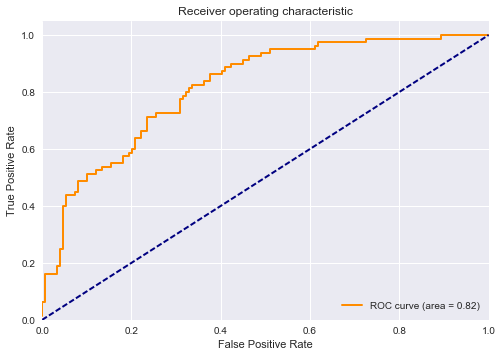

In [27]:
y_pred_minmax_imp, y_score_minmax_imp = svc_rbf(X_train_minmax_imp, y_train_imp, X_test_minmax_imp, y_test_imp, best_C, best_gamma)
_ = roc_curv(y_test_imp, y_score_minmax_imp)

<H3>Classification Report (best_C, best_gamma):</H3>

In [28]:
_ = clss_report(y_test_imp, y_pred_minmax_imp)

             precision    recall  f1-score   support

          0       0.77      0.92      0.84       149
          1       0.76      0.47      0.58        80

avg / total       0.76      0.76      0.75       229



<H1 style="color:blue;">Best results: </H1>

<H2 style="color:darkorange;">Imputing-method1: </H2> <b>droping the rows where there is more than two features are 'NaN' (about 7 rows) along with dropping 'insu' and 'skin' columns based on my analysis in exploreData section which shows 'skin' with 30% missing data is correlated with 'mass'. Same senario with 'insu' with 49% missing data correlated with 'plas'</b>

Using imput_ function


Prediction accuracy:  0.777292576419

Confusion Matrix:
[[134  15]
 [ 36  44]]
AUC using decision_function:  0.812332214765


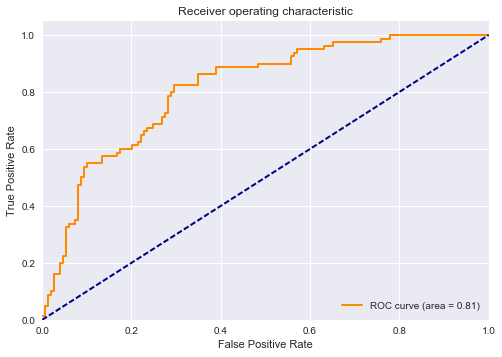

In [29]:
c= 100
g= .881
X_train_imp, X_test_imp, y_train_imp, y_test_imp = imput_(df, "mean", ['insu', 'skin'])
X_train_minmax_imp, X_test_minmax_imp = minmax_s(X_train_imp, X_test_imp)
y_pred_minmax_imp, y_score_minmax_imp= svc_rbf(X_train_minmax_imp, y_train_imp, X_test_minmax_imp, y_test_imp, c, g)
_ = roc_curv(y_test_imp, y_score_minmax_imp)

<H3>Classification Report :</H3>

In [30]:
_ = clss_report(y_test_imp, y_pred_minmax_imp)

             precision    recall  f1-score   support

          0       0.79      0.90      0.84       149
          1       0.75      0.55      0.63        80

avg / total       0.77      0.78      0.77       229



<H2 style="color:green;">Imputing-method2: </H2> <b>droping all the rows when 'pres' is 0 or 'NaN' (about 35 rows) along with dropping 'insu' and 'skin' columns based on my analysis in exploreData section which shows 'skin' with 30% missing data is correlated with 'mass'. Same senario with 'insu' with 49% missing data correlated with 'plas'.</b>

Using imput_drop_more function


Prediction accuracy:  0.781818181818

Confusion Matrix:
[[131  13]
 [ 35  41]]
AUC using decision_function:  0.824926900585


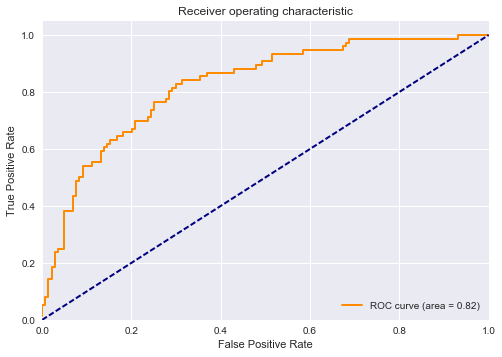

In [31]:
c= 10
g= .018
X_train_imp, X_test_imp, y_train_imp, y_test_imp = imput_drop_more(df, "mean", ['insu', 'skin'])
X_train_minmax_imp, X_test_minmax_imp = minmax_s(X_train_imp, X_test_imp)
y_pred_minmax_imp, y_score_minmax_imp= svc_rbf(X_train_minmax_imp, y_train_imp, X_test_minmax_imp, y_test_imp, c, g)
_ = roc_curv(y_test_imp, y_score_minmax_imp)

<H3>Classification Report :</H3>

In [32]:
_ = clss_report(y_test_imp, y_pred_minmax_imp)

             precision    recall  f1-score   support

          0       0.79      0.91      0.85       144
          1       0.76      0.54      0.63        76

avg / total       0.78      0.78      0.77       220

